In [4]:
import torch
import sys
sys.path.append('../../modules')
from notable_functions import gibbs_function as arctan20x
from notable_kernels import *
from nn_rbf_poly import RBF_Poly
from nn_rbf import RBF_Fix_All as RBF
import matplotlib.pyplot as plt

colors = ['red', 'blue', 'green']
x_ver = torch.linspace(-1, 1, 300).reshape(-1, 1)

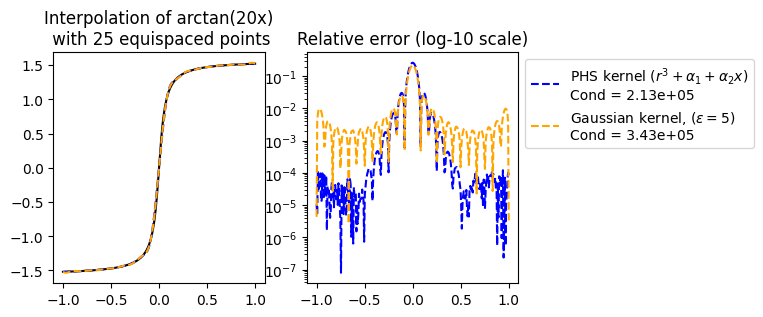

In [58]:
n = 25
deg = 1
phs_deg = 2*deg + 1
x = torch.linspace(-1, 1, n).reshape(-1, 1)
y = arctan20x(x)
y_ver = arctan20x(x_ver)

plt.figure(figsize=(6,3))

with torch.no_grad():
    plt.subplot(1, 2, 1)
    plt.plot(x_ver, y_ver, color="black")

rbf = RBF_Poly(centers = x, degree = deg, kernel = phs_kernel(phs_deg))
A = rbf.get_interpolation_matrix(x)
opt_coefs = torch.linalg.solve(A, torch.cat((y, torch.zeros(size=(deg + 1, 1), device=y.device))))
rbf.set_coefs(opt_coefs[:-(deg+1)].T, opt_coefs[-(deg+1):].T)

with torch.no_grad():
    plt.subplot(1, 2, 1)
    plt.plot(x_ver, rbf(x_ver), color='blue', label=r'PHS kernel ($r^3+\alpha_1+\alpha_2 x$)'+f'\nCond = {torch.linalg.cond(A):.2e}', linestyle='--')
    plt.subplot(1, 2, 2)
    plt.semilogy(x_ver, torch.abs(rbf(x_ver) - y_ver) / torch.abs(y_ver), 
                color='blue', linestyle='--')
    
rbf = RBF(centers = x, rbf_kernel=gaussian_kernel(eps=5))

A = rbf.get_interpolation_matrix(x)
opt_coefs = torch.linalg.solve(A, y)
rbf.set_coefs(opt_coefs.T)

with torch.no_grad():
    plt.subplot(1, 2, 1)
    plt.plot(x_ver, rbf(x_ver), color='orange', label=r'Gaussian kernel, ($\varepsilon=5$)'+f'\nCond = {torch.linalg.cond(A):.2e}', linestyle='--')
    plt.subplot(1, 2, 2)
    plt.semilogy(x_ver, torch.abs(rbf(x_ver) - y_ver) / torch.abs(y_ver), 
                color='orange', label=f'{n} centers', linestyle='--')
    



plt.subplot(1,2,1)

plt.title(f'Interpolation of arctan(20x)\n with {n} equispaced points')
handles, labels = plt.gca().get_legend_handles_labels()

plt.subplot(1, 2, 2)
plt.title('Relative error (log-10 scale)')
plt.legend(handles = handles, loc='upper left', bbox_to_anchor=(1, 1))
plt.subplot(1, 2, 1)


plt.show()
plt.close()

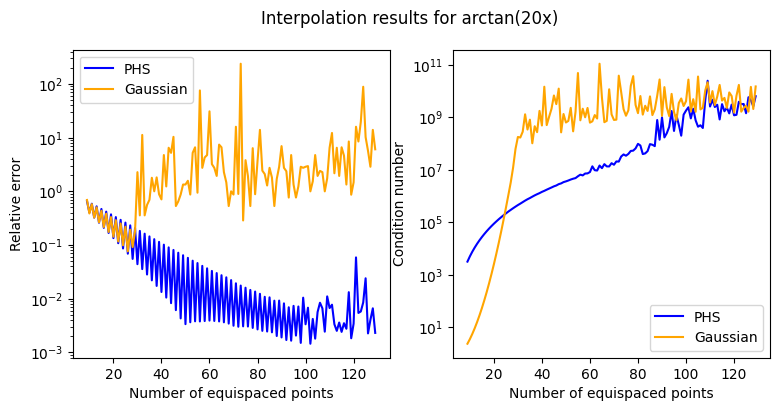

In [93]:
y_ver = arctan20x(x_ver)
list_max = 130
l_infs_phs = [0.] * len(list(range(9,list_max)))
l_infs_rbf = [0.] * len(list(range(9,list_max)))

conds_phs = [0.] * len(list(range(9,list_max)))
conds_rbf = [0.] * len(list(range(9,list_max)))


for n in range(9, list_max):
    deg = 1
    phs_deg = 2*deg + 1
    x = torch.linspace(-1, 1, n).reshape(-1, 1)
    y = arctan20x(x)
    
    rbf = RBF_Poly(centers = x, degree = deg, kernel = phs_kernel(phs_deg))
    A = rbf.get_interpolation_matrix(x)
    opt_coefs = torch.linalg.solve(A, torch.cat((y, torch.zeros(size=(deg + 1, 1), device=y.device))))
    rbf.set_coefs(opt_coefs[:-(deg+1)].T, opt_coefs[-(deg+1):].T)

    l_infs_phs[n-9] = torch.max(torch.abs(rbf(x_ver) - y_ver) / torch.abs(y_ver))
    conds_phs[n-9] = torch.linalg.cond(A)
        
    rbf = RBF(centers = x, rbf_kernel=gaussian_kernel(eps=5))

    A = rbf.get_interpolation_matrix(x)
    opt_coefs = torch.linalg.solve(A, y)
    rbf.set_coefs(opt_coefs.T)

    l_infs_rbf[n-9] = torch.max(torch.abs(rbf(x_ver) - y_ver) / torch.abs(y_ver))
    conds_rbf[n-9] = torch.linalg.cond(A)

plt.figure(figsize=(9,4))
with torch.no_grad():    
    plt.subplot(1,2,1)
    plt.semilogy(list(range(9,list_max)), l_infs_phs,color='blue', label='PHS')
    plt.semilogy(list(range(9,list_max)), l_infs_rbf,color='orange', label='Gaussian')
    plt.legend()
    plt.xlabel('Number of equispaced points')
    plt.ylabel('Relative error')
    plt.subplot(1,2,2)
    plt.semilogy(list(range(9,list_max)), conds_phs,color='blue',  label='PHS')
    plt.semilogy(list(range(9,list_max)), conds_rbf,color='orange', label='Gaussian')
    plt.legend()
    plt.xlabel('Number of equispaced points')
    plt.ylabel('Condition number')
    plt.suptitle("Interpolation results for arctan(20x)")
    plt.show()
    # plt.savefig('arctan20x-interpolation-curves.pdf', bbox_inches='tight')
plt.close()

------------

Similar work with the sign function:

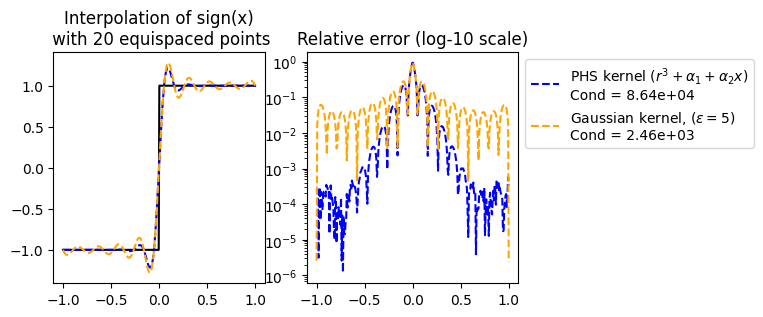

In [57]:
n = 20
deg = 1
phs_deg = 2*deg + 1
x = torch.linspace(-1, 1, n).reshape(-1, 1)
y = torch.sign(x)
y_ver = torch.sign(x_ver)

plt.figure(figsize=(6,3))

with torch.no_grad():
    plt.subplot(1, 2, 1)
    plt.plot(x_ver, y_ver, color="black")

rbf = RBF_Poly(centers = x, degree = deg, kernel = phs_kernel(phs_deg))
A = rbf.get_interpolation_matrix(x)
opt_coefs = torch.linalg.solve(A, torch.cat((y, torch.zeros(size=(deg + 1, 1), device=y.device))))
rbf.set_coefs(opt_coefs[:-(deg+1)].T, opt_coefs[-(deg+1):].T)

with torch.no_grad():
    plt.subplot(1, 2, 1)
    plt.plot(x_ver, rbf(x_ver), color='blue', label=r'PHS kernel ($r^3+\alpha_1+\alpha_2 x$)'+f'\nCond = {torch.linalg.cond(A):.2e}', linestyle='--')
    plt.subplot(1, 2, 2)
    plt.semilogy(x_ver, torch.abs(rbf(x_ver) - y_ver) / torch.abs(y_ver), 
                color='blue', linestyle='--')
    
rbf = RBF(centers = x, rbf_kernel=gaussian_kernel(eps=5))

A = rbf.get_interpolation_matrix(x)
opt_coefs = torch.linalg.solve(A, y)
rbf.set_coefs(opt_coefs.T)

with torch.no_grad():
    plt.subplot(1, 2, 1)
    plt.plot(x_ver, rbf(x_ver), color='orange', label=r'Gaussian kernel, ($\varepsilon=5$)'+f'\nCond = {torch.linalg.cond(A):.2e}', linestyle='--')
    plt.subplot(1, 2, 2)
    plt.semilogy(x_ver, torch.abs(rbf(x_ver) - y_ver) / torch.abs(y_ver), 
                color='orange', label=f'{n} centers', linestyle='--')
    



plt.subplot(1,2,1)

plt.title(f'Interpolation of sign(x)\n with {n} equispaced points')
handles, labels = plt.gca().get_legend_handles_labels()

plt.subplot(1, 2, 2)
plt.title('Relative error (log-10 scale)')
plt.legend(handles = handles, loc='upper left', bbox_to_anchor=(1, 1))
plt.subplot(1, 2, 1)
plt.show()
plt.close()

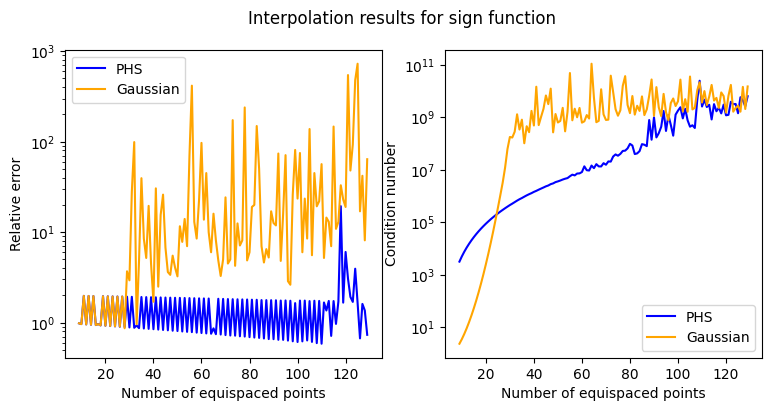

In [98]:
y_ver = torch.sign(x_ver)
list_max = 130
l_infs_phs = [0.] * len(list(range(9,list_max)))
l_infs_rbf = [0.] * len(list(range(9,list_max)))

conds_phs = [0.] * len(list(range(9,list_max)))
conds_rbf = [0.] * len(list(range(9,list_max)))


for n in range(9, list_max):
    deg = 1
    phs_deg = 2*deg + 1
    x = torch.linspace(-1, 1, n).reshape(-1, 1)
    y = torch.sign(x)
    
    rbf = RBF_Poly(centers = x, degree = deg, kernel = phs_kernel(phs_deg))
    A = rbf.get_interpolation_matrix(x)
    opt_coefs = torch.linalg.solve(A, torch.cat((y, torch.zeros(size=(deg + 1, 1), device=y.device))))
    rbf.set_coefs(opt_coefs[:-(deg+1)].T, opt_coefs[-(deg+1):].T)

    l_infs_phs[n-9] = torch.max(torch.abs(rbf(x_ver) - y_ver) / torch.abs(y_ver))
    conds_phs[n-9] = torch.linalg.cond(A)
        
    rbf = RBF(centers = x, rbf_kernel=gaussian_kernel(eps=5))

    A = rbf.get_interpolation_matrix(x)
    opt_coefs = torch.linalg.solve(A, y)
    rbf.set_coefs(opt_coefs.T)

    l_infs_rbf[n-9] = torch.max(torch.abs(rbf(x_ver) - y_ver) / torch.abs(y_ver))
    conds_rbf[n-9] = torch.linalg.cond(A)

plt.figure(figsize=(9,4))
with torch.no_grad():    
    plt.subplot(1,2,1)
    plt.semilogy(list(range(9,list_max)), l_infs_phs,color='blue', label='PHS')
    plt.semilogy(list(range(9,list_max)), l_infs_rbf,color='orange', label='Gaussian')
    plt.legend()
    plt.xlabel('Number of equispaced points')
    plt.ylabel('Relative error')
    plt.subplot(1,2,2)
    plt.semilogy(list(range(9,list_max)), conds_phs,color='blue',  label='PHS')
    plt.semilogy(list(range(9,list_max)), conds_rbf,color='orange', label='Gaussian')
    plt.legend()
    plt.xlabel('Number of equispaced points')
    plt.ylabel('Condition number')
    plt.suptitle("Interpolation results for sign function")
    plt.show()
plt.close()